# 2b. resolucion de la EDO de 2do grado:  d^2 y/dx^2 = - y

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [12]:
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
          with tf.GradientTape() as tape2:
            tape2.watch(x)   #vigila todas las operaciones que se hacen con la variable x
       
            with tf.GradientTape(persistent=True) as tape3: 
              tape3.watch(x)
              x_o = tf.zeros((batch_size, 1))
              tape3.watch(x_o)
              y_pred = self(x, training = True)
              y_o = self(x_o, training = True)

            dy = tape3.gradient(y_pred, x)
            dy_o = tape3.gradient(y_o, x_o)
            #vectores de ceros
          dy_2=tape2.gradient(dy,x)
          

            #funcion de costo, la ecuacion diferencial 
          eq = dy_2 + y_pred 
            
            #initial condition, y(0) = 1
          ic = y_o -1. 
          ic_2 = dy_o 
            #queremos que el error sea 0 
          loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(-0.5,ic_2)
    
        grads =tape.gradient(loss, self.trainable_variables)
    
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
        self.loss_tracker.update_state(loss)
    
        return  {"loss": self.loss_tracker.result()}

In [16]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer = RMSprop(), metrics = ['loss'])


Model: "od_esolver_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                40        
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________


In [17]:
x = tf.linspace(-5, 5, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-5, 5, 100)

a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 2s 2ms/step - loss: 2.8491
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.3700
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8587
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6257
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.5066
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4557
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4384
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3885
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3416
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3252
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2587
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0941
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 105/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0966
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1014
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1047
Epoch 108/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1070
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 110/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0837
Epoch 111/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1118
Epoch 112/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1016
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1159
Epoch 114/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1046
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 207/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0799
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 210/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 212/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0759
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 214/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 215/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 307/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 310/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0358
Epoch 311/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 312/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 313/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 314/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 315/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 316/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 407/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 413/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0284
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 416/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 418/1000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 509/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 510/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 512/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 513/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 517/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 518/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 610/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 616/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 618/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 619/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 710/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 711/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 713/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 716/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 717/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 718/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 719/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 720/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 812/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 813/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 814/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 815/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 817/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 818/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 820/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 821/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 912/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 913/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 914/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 915/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 916/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 918/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 919/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 920/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 921/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 922/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 923/1000
4/4 [=======================

In [ ]:
#model.save("rna_edo_solver1")

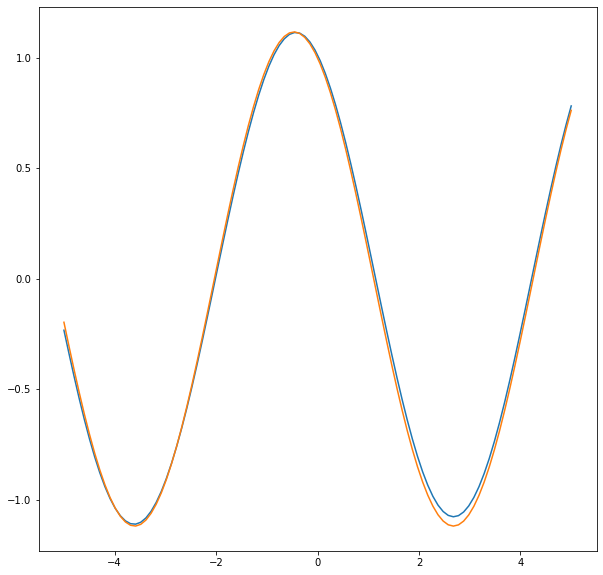

In [18]:
plt.figure(figsize = (10,10))
plt.plot(x_testv, a)
#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, tf.cos(x) - 0.5*tf.sin(x)) 
plt.show()